# **Deciphering Protein Sequence Relationships: A Python-Based Approach**

In [ ]:
# Install necessary libraries (Biopython, matplotlib, etc.)
!pip install biopython
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.1 MB/s eta 0:00:00


In [ ]:
# Install BLAST+ tools
!apt-get install ncbi-blast+

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  liblmdb0 ncbi-data
The following NEW packages will be installed:
  liblmdb0 ncbi-blast+ ncbi-data
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 15.9 MB of archives.
After this operation, 71.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblmdb0 amd64 0.9.24-1build2 [47.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-data all 6.1.20170106+dfsg1-9 [3,519 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-blast+ amd64 2.12.0+ds-3build1 [12.3 MB]
Fetched 15.9 MB in 1s (29.1 MB/s)
Selecting previously unselected package liblmdb0:amd64.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../liblmdb0_0.9.24-1build2_amd64.deb ...
Unpacking liblmdb0:amd64 (0.9.24-1build2) ...
Selec

In [ ]:
!pip install biopython requests

In [ ]:
!pip install rich

Step 1: Setup and Data Acquisition

In [59]:
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib.pyplot as plt
from Bio import ExPASy
from Bio import SwissProt
from rich.console import Console
from rich.progress import track
from rich.table import Table

# Function to fetch protein sequences from UniProt
def fetch_protein_sequence(accession):
    handle = ExPASy.get_sprot_raw(accession)
    record = SwissProt.read(handle)
    return record.sequence

# Accession numbers for the proteins
accession_numbers = ['P02771', 'P68137']

# Fetch sequences with progress tracking
console = Console()
sequences = {}

for acc in track(accession_numbers, description="Fetching Protein Sequences..."):
    sequences[acc] = fetch_protein_sequence(acc)

# Display the fetched sequences in a formatted table
console.print("\n[bold bright_cyan]Fetched Protein Sequences:[/bold bright_cyan]\n", style="bold")

for acc, seq in sequences.items():
    # Create the table
    table = Table(show_header=True, header_style="bold bright_magenta", box=None)
    table.add_column("Accession Number", style="bright_cyan", width=20)
    table.add_column("Sequence", style="bold bright_white", overflow="fold")

    # Add the full sequence to the table
    table.add_row(acc, seq)

    # Print the table
    console.print(table)
    console.print(f"[bright_green]Full Sequence Length:[/bright_green] {len(seq)}\n")


Output()

Fetched Protein Sequences:

 Accession Number      Sequence                                                                                    
 P02771                MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQL 
                       PAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWA 
                       ARYDKIIPSCCKAENAVECFQTKAATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGD 
                       VLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQ 
                       LAVSVILRVAKGYQELLEKCFQTENPLECQDKGEEELQKYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLTSSELMAITRKMA 
                       ATAATCCQLSEDKLLACGEGAADIIIGHLCIRHEMTPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQ 
                       TMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQEVCFAEEGQKLISKTRAALGV                             

Full Sequence Length: 609

 Accession Number      Sequence                                                                                    
 P68137                MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHT 
                       FYNELRVAPEEHPTLLTEAPLNPKANREKMTQIMFETFNVPAMYVAIQAVLSLYASGRTTGIVLDSGDGVTHNVPIYEGYALPHAIMRLDL 
                       AGRDLTDYLMKILTERGYSFVTTAEREIVRDIKEKLCYVALDFENEMATAASSSSLEKSYELPDGQVITIGNERFRCPETLFQPSFIGMES 
                       AGIHETTYNSIMKCDIDIRKDLYANNVMSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWITKQEY 
                       DEAGPSIVHRKCF                                                                               

Full Sequence Length: 377

**Step 2: Sequence Retrieval and Basic Analysis**

In [58]:
from Bio.SeqUtils import ProtParam
from rich.console import Console
from rich.table import Table
from rich.progress import track

# Function to analyze basic properties of the protein sequences
def basic_sequence_analysis(sequences):
    analysis_results = {}
    for acc, seq in sequences.items():
        analysis = ProtParam.ProteinAnalysis(seq)
        analysis_results[acc] = {
            'Length': len(seq),
            'Amino Acid Composition': analysis.count_amino_acids(),
            'Molecular Weight': analysis.molecular_weight(),
            'Isoelectric Point': analysis.isoelectric_point(),
            'Aromaticity': analysis.aromaticity(),
            'Instability Index': analysis.instability_index(),
            'Secondary Structure Fraction': analysis.secondary_structure_fraction()
        }
    return analysis_results

# Perform basic sequence analysis with progress bar
console = Console()
analysis_results = basic_sequence_analysis(sequences)

# Display results using a rich table
for acc in track(analysis_results, description="Analyzing Sequences..."):
    analysis = analysis_results[acc]

    console.print(f"\n[bold bright_cyan]Analysis for {acc}:[/bold bright_cyan]\n", style="bold")

    table = Table(show_header=True, header_style="bold bright_magenta")
    table.add_column("Property", style="bright_cyan", width=25)  # Bright cyan color for Property column
    table.add_column("Value", style="bold bright_white")

    for prop, value in analysis.items():
        if isinstance(value, dict):  # Special case for Amino Acid Composition
            comp_table = Table(show_header=True, header_style="bold bright_green")
            comp_table.add_column("Amino Acid", style="bright_yellow", width=15)  # Bright yellow color for Amino Acid column
            comp_table.add_column("Count", justify="right", style="bold bright_white")
            for aa, count in value.items():
                comp_table.add_row(aa, str(count))
            table.add_row(prop, "")
            console.print(comp_table)
        else:
            table.add_row(prop, str(value))

    console.print(table)


Output()

Analysis for P02771:

┏━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Amino Acid      ┃ Count ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ A               │    50 │
│ C               │    32 │
│ D               │    23 │
│ E               │    59 │
│ F               │    32 │
│ G               │    26 │
│ H               │    16 │
│ I               │    34 │
│ K               │    42 │
│ L               │    60 │
│ M               │     9 │
│ N               │    20 │
│ P               │    21 │
│ Q               │    40 │
│ R               │    22 │
│ S               │    38 │
│ T               │    36 │
│ V               │    30 │
│ W               │     2 │
│ Y               │    17 │
└─────────────────┴───────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property                  ┃ Value                                                         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Length                    │ 609                                                           │
│ Amino Acid Composition    │                                                               │
│ Molecular Weight          │ 68676.8551000002                                              │
│ Isoelectric Point         │ 5.479301643371582                                             │
│ Aromaticity               │ 0.08374384236453201                                           │
│ Instability Index         │ 51.026929392446746                                            │
│ Secondary Structure       │ (0.361247947454844, 0.21018062397372744, 0.34646962233169126) │
│ Fraction                  │                                                               │
└───────────────────────────┴───────────────────────────────────────────────────────────────┘

Analysis for P68137:

┏━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Amino Acid      ┃ Count ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ A               │    29 │
│ C               │     6 │
│ D               │    22 │
│ E               │    28 │
│ F               │    12 │
│ G               │    28 │
│ H               │     9 │
│ I               │    30 │
│ K               │    19 │
│ L               │    26 │
│ M               │    17 │
│ N               │    12 │
│ P               │    19 │
│ Q               │    11 │
│ R               │    18 │
│ S               │    23 │
│ T               │    27 │
│ V               │    21 │
│ W               │     4 │
│ Y               │    16 │
└─────────────────┴───────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property                  ┃ Value                                                          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Length                    │ 377                                                            │
│ Amino Acid Composition    │                                                                │
│ Molecular Weight          │ 42050.58240000005                                              │
│ Isoelectric Point         │ 5.229437446594236                                              │
│ Aromaticity               │ 0.08488063660477453                                            │
│ Instability Index         │ 36.13583554376657                                              │
│ Secondary Structure       │ (0.31564986737400536, 0.27586206896551724, 0.3607427055702918) │
│ Fraction                  │                                                                │
└───────────────────────────┴────────────────────────────────────────────────────────────────┘

**Step 3: Sequence Alignment using BLAST**

In [57]:
from Bio.Blast import NCBIWWW, NCBIXML
from rich.console import Console
from rich.table import Table
from rich.panel import Panel

def blast_alignment(seq1, seq2):
    result_handle = NCBIWWW.qblast("blastp", "nr", seq1)
    blast_record = NCBIXML.read(result_handle)
    alignments = blast_record.alignments
    return alignments

# Perform alignment for the sequences
console = Console()
alignments = blast_alignment(sequences[accession_numbers[0]], sequences[accession_numbers[1]])

for alignment in alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 0.01:  # Only print alignments with E-value < 0.01
            panel_title = f"[bold bright_cyan]Alignment with {alignment.title}[/bold bright_cyan]"
            alignment_table = Table(show_header=True, header_style="bold bright_magenta")

            alignment_table.add_column("Property", style="bright_blue", width=20)  # Bright blue for Property column
            alignment_table.add_column("Value", style="bold bright_white")

            alignment_table.add_row("Sequence Title", alignment.title)
            alignment_table.add_row("Length", str(alignment.length))
            alignment_table.add_row("E-value", f"[bold bright_red]{hsp.expect}[/bold bright_red]")

            console.print(Panel(alignment_table, title=panel_title, border_style="bright_green"))

            # Query, Match, Subject sequences
            seq_table = Table(show_header=True, header_style="bold bright_yellow")
            seq_table.add_column("Type", style="bright_green", width=10)  # Bright green for Type column
            seq_table.add_column("Sequence", style="bold bright_white")

            seq_table.add_row("[bold bright_cyan]Query[/bold bright_cyan]", hsp.query)
            seq_table.add_row("[bold bright_magenta]Match[/bold bright_magenta]", hsp.match)
            seq_table.add_row("[bold bright_yellow]Subject[/bold bright_yellow]", hsp.sbjct)

            console.print(seq_table)
            console.print("\n" + "-"*80 + "\n")  # Separator line between alignments

╭─ Alignment with ref|NP_001125.1| alpha-fetoprotein isoform 1 precursor [Homo sapiens] >sp|P02771.1| RecName: Fu─╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Property             ┃ Value                                                                                ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Sequence Title       │ ref|NP_001125.1| alpha-fetoprotein isoform 1 precursor [Homo sapiens] >sp|P02771.1|  │ │
│ │                      │ RecName: Full=Alpha-fetoprotein; AltName: Full=Alpha-1-fetoprotein; AltName:         │ │
│ │                      │ Full=Alpha-fetoglobulin; Flags: Precursor [Homo sapiens] >pdb|7YIM|A Chain A,        │ │
│ │                      │ Alpha-fetoprotein [Homo sapiens] >pdb|8X1N|A Chain A, Alpha-fetoprotein [Homo        │ │
│ │                      │ sapiens] >gb|ABM81868.1| alpha-fetoprotein  >gb|QJX60209.1| AFP [Cloning vector      │ │
│ │                      │ pcDNA3.1-AFP] >emb|SJX49082.1| unnamed protein product, partial [Human ORFeome       │ │
│ │                      │ Gateway entry vector] >gb|AAB58754.1| alpha-fetoprotein [Homo sapiens]               │ │
│ │                      │ >gb|AAH27881.1| Alpha-fetoprotein [Homo sapiens]                                     │ │
│ │ Length               │ 609                                                                                  │ │
│ │ E-value              │ 0.0                                                                                  │ │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘ │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭───────────────────── Alignment with dbj|BAG37340.1| unnamed protein product [Homo sapiens] ─────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ Property             ┃ Value                                                  ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Sequence Title       │ dbj|BAG37340.1| unnamed protein product [Homo sapiens] │                               │
│ │ Length               │ 609                                                    │                               │
│ │ E-value              │ 0.0                                                    │                               │
│ └──────────────────────┴────────────────────────────────────────────────────────┘                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│            │ VIADFSGLLEKCCQGQEQEVCFAEEGQKLISKTRAALGV                                                            │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────────── Alignment with ref|XP_034813958.2| alpha-fetoprotein [Pan paniscus] ──────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                                 │
│ ┃ Property             ┃ Value                                                ┃                                 │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                                 │
│ │ Sequence Title       │ ref|XP_034813958.2| alpha-fetoprotein [Pan paniscus] │                                 │
│ │ Length               │ 609                                                  │                                 │
│ │ E-value              │ 0.0                                                  │                                 │
│ └──────────────────────┴──────────────────────────────────────────────────────┘                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L                                                        │
│            │ DLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQS+GCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQV… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLTDLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─ Alignment with ref|XP_004038852.2| alpha-fetoprotein [Gorilla gorilla gorilla] >sp|P28050.1| RecName: Full=Alp─╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Property             ┃ Value                                                                                ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Sequence Title       │ ref|XP_004038852.2| alpha-fetoprotein [Gorilla gorilla gorilla] >sp|P28050.1|        │ │
│ │                      │ RecName: Full=Alpha-fetoprotein; AltName: Full=Alpha-1-fetoprotein; AltName:         │ │
│ │                      │ Full=Alpha-fetoglobulin; Flags: Precursor [Gorilla gorilla gorilla] >gb|AAA73520.1|  │ │
│ │                      │ alpha-fetoprotein [Gorilla gorilla]                                                  │ │
│ │ Length               │ 609                                                                                  │ │
│ │ E-value              │ 0.0                                                                                  │ │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘ │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQS+GCLENQLPAFLEE… │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAA… │
│            │ VIADFSGLLEKCCQGQEQEVCFAEEGQKLISKTR ALGV                                                            │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─ Alignment with gb|PNI82749.1| AFP isoform 3 [Pan troglodytes] >gb|PNI82750.1| AFP isoform 4 [Pan troglodytes] ─╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Property             ┃ Value                                                                                ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Sequence Title       │ gb|PNI82749.1| AFP isoform 3 [Pan troglodytes] >gb|PNI82750.1| AFP isoform 4 [Pan    │ │
│ │                      │ troglodytes]                                                                         │ │
│ │ Length               │ 609                                                                                  │ │
│ │ E-value              │ 0.0                                                                                  │ │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘ │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L                                                        │
│            │ DLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQS+GCLENQLPAFLEELC                                            │
│            │ EKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAEN… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLTDLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─ Alignment with sp|Q28789.1| RecName: Full=Alpha-fetoprotein; AltName: Full=Alpha-1-fetoprotein; AltName: Full=─╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Property             ┃ Value                                                                                ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Sequence Title       │ sp|Q28789.1| RecName: Full=Alpha-fetoprotein; AltName: Full=Alpha-1-fetoprotein;     │ │
│ │                      │ AltName: Full=Alpha-fetoglobulin; Flags: Precursor [Pan troglodytes] >gb|AAA91641.1| │ │
│ │                      │ alpha-fetoprotein precursor [Pan troglodytes]                                        │ │
│ │ Length               │ 609                                                                                  │ │
│ │ E-value              │ 0.0                                                                                  │ │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘ │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L                                                        │
│            │ DLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQS+GCLENQLPAFLEELC EKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIP      │
│            │ FQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAATVTKELRESSLLNQHACAVMKNFGTRTF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLTDLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────────── Alignment with ref|XP_055152203.2| alpha-fetoprotein [Symphalangus syndactylus] ────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                     │
│ ┃ Property             ┃ Value                                                            ┃                     │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                     │
│ │ Sequence Title       │ ref|XP_055152203.2| alpha-fetoprotein [Symphalangus syndactylus] │                     │
│ │ Length               │ 609                                                              │                     │
│ │ E-value              │ 0.0                                                              │                     │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────┘                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+LADLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEKEIL KYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAA… │
│            │ GEEELQKYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLTSSELMAITRKMAATAATCCQLSEDKLLACGEGAADIIIGHLCIRHEMTPV… │
│            │ LLEKCCQGQEQEVCFAEEGQKLISKTRAALGV                                                                   │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLADLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─ Alignment with ref|XP_002814900.1| alpha-fetoprotein [Pongo abelii] >gb|PNJ48716.1| AFP isoform 3 [Pongo abeli─╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Property             ┃ Value                                                                                ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Sequence Title       │ ref|XP_002814900.1| alpha-fetoprotein [Pongo abelii] >gb|PNJ48716.1| AFP isoform 3   │ │
│ │                      │ [Pongo abelii]                                                                       │ │
│ │ Length               │ 609                                                                                  │ │
│ │ E-value              │ 0.0                                                                                  │ │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘ │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLN TESRTLHRNEYGIASILDSYQC AEI+L                                                        │
│            │ DLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQS+GCLENQLPAFLEELCHEKEILEKYG                                  │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTK    │
│            │ ATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECC… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNLTESRTLHRNEYGIASILDSYQCAAEINLTDLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭───────────────────── Alignment with ref|XP_054341646.1| alpha-fetoprotein [Pongo pygmaeus] ─────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ Property             ┃ Value                                                  ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Sequence Title       │ ref|XP_054341646.1| alpha-fetoprotein [Pongo pygmaeus] │                               │
│ │ Length               │ 609                                                    │                               │
│ │ E-value              │ 0.0                                                    │                               │
│ └──────────────────────┴────────────────────────────────────────────────────────┘                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLN TESRTLHRNEYGIASILDSYQC AEI+L                                                        │
│            │ DLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQS+GCLENQLPAFLEELCHEKEILEKYG                                  │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYE+DRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTK    │
│            │ ATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECC… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNLTESRTLHRNEYGIASILDSYQCAAEINLTDLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─ Alignment with gb|KAI2534616.1| alpha fetoprotein [Homo sapiens] >gb|KAI4025716.1| alpha fetoprotein [Homo sap─╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Property             ┃ Value                                                                                ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Sequence Title       │ gb|KAI2534616.1| alpha fetoprotein [Homo sapiens] >gb|KAI4025716.1| alpha            │ │
│ │                      │ fetoprotein [Homo sapiens]                                                           │ │
│ │ Length               │ 622                                                                                  │ │
│ │ E-value              │ 0.0                                                                                  │ │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘ │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────── Alignment with ref|XP_025242601.1| alpha-fetoprotein [Theropithecus gelada] ──────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                         │
│ ┃ Property             ┃ Value                                                        ┃                         │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                         │
│ │ Sequence Title       │ ref|XP_025242601.1| alpha-fetoprotein [Theropithecus gelada] │                         │
│ │ Length               │ 609                                                          │                         │
│ │ E-value              │ 0.0                                                          │                         │
│ └──────────────────────┴──────────────────────────────────────────────────────────────┘                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHA+NDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────────────── Alignment with ref|XP_032006196.1| alpha-fetoprotein [Hylobates moloch] ────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                             │
│ ┃ Property             ┃ Value                                                    ┃                             │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                             │
│ │ Sequence Title       │ ref|XP_032006196.1| alpha-fetoprotein [Hylobates moloch] │                             │
│ │ Length               │ 605                                                      │                             │
│ │ E-value              │ 0.0                                                      │                             │
│ └──────────────────────┴──────────────────────────────────────────────────────────┘                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+LADLATIFFAQFVQEATYKEVSKMVKD LTAI                         │
│            │ GDEQS+GCLENQLPAFLEELCHEKEILEKYG                                                                    │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAA… │
│            │ LLEKCCQGQEQEVCFAEEGQKLISKTRAALGV                                                                   │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLADLATIFFAQFVQEATYKEVSKMVKDVLTAI----GDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭───────────────────── Alignment with ref|XP_014994024.2| alpha-fetoprotein [Macaca mulatta] ─────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ Property             ┃ Value                                                  ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Sequence Title       │ ref|XP_014994024.2| alpha-fetoprotein [Macaca mulatta] │                               │
│ │ Length               │ 609                                                    │                               │
│ │ E-value              │ 0.0                                                    │                               │
│ └──────────────────────┴────────────────────────────────────────────────────────┘                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIP+FQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────────── Alignment with ref|XP_033070357.1| alpha-fetoprotein [Trachypithecus francoisi] ────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                     │
│ ┃ Property             ┃ Value                                                            ┃                     │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                     │
│ │ Sequence Title       │ ref|XP_033070357.1| alpha-fetoprotein [Trachypithecus francoisi] │                     │
│ │ Length               │ 609                                                              │                     │
│ │ E-value              │ 0.0                                                              │                     │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────┘                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+LADLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEKEILEKYG                                                            │
│            │ S+CCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSY+CSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNL     │
│            │ RFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGYQELLEKCFQTENPLECQDKGEEELQKYIQESQALAKRSCGLFQKLGEYYLQ… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQ                                                  │
│            │ QGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQEVCFAEEGQKLISKTRAALGV                              │
│ Subject    │ MKWVGSIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLADLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────── Alignment with ref|XP_023054287.2| alpha-fetoprotein [Piliocolobus tephrosceles] ────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                    │
│ ┃ Property             ┃ Value                                                             ┃                    │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                    │
│ │ Sequence Title       │ ref|XP_023054287.2| alpha-fetoprotein [Piliocolobus tephrosceles] │                    │
│ │ Length               │ 609                                                               │                    │
│ │ E-value              │ 0.0                                                               │                    │
│ └──────────────────────┴───────────────────────────────────────────────────────────────────┘                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+LADLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEKEILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSY+CSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNL     │
│            │ RFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGYQELLEKCFQ ENPLECQDKGEEELQKYIQESQALAKRSC              │
│            │ LFQKLGEYYLQNAFLVAYTKKAPQLTSSELMAITRKMAATAATCCQLSEDKLLACGEGAADIIIGHLCIRHE                           │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVGSIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLADLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────── Alignment with ref|XP_030674841.1| alpha-fetoprotein [Nomascus leucogenys] ───────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                          │
│ ┃ Property             ┃ Value                                                       ┃                          │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                          │
│ │ Sequence Title       │ ref|XP_030674841.1| alpha-fetoprotein [Nomascus leucogenys] │                          │
│ │ Length               │ 605                                                         │                          │
│ │ E-value              │ 0.0                                                         │                          │
│ └──────────────────────┴─────────────────────────────────────────────────────────────┘                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+LADLATIFFAQFVQEATYKEVSKMVKD LTAI                         │
│            │ GDEQS+GCLENQLPAFLEELCHEKEILEKYG                                                                    │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFM+KFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAA… │
│            │ LLEKCCQ QEQEVCFAEEGQKLISKTRAALGV                                                                   │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLADLATIFFAQFVQEATYKEVSKMVKDVLTAI----GDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────── Alignment with ref|XP_007997054.2| alpha-fetoprotein [Chlorocebus sabaeus] ───────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                          │
│ ┃ Property             ┃ Value                                                       ┃                          │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                          │
│ │ Sequence Title       │ ref|XP_007997054.2| alpha-fetoprotein [Chlorocebus sabaeus] │                          │
│ │ Length               │ 609                                                         │                          │
│ │ E-value              │ 0.0                                                         │                          │
│ └──────────────────────┴─────────────────────────────────────────────────────────────┘                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTA+EKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRE             │
│            │ FMN+FIYEIARRHPFLY+PTILL AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                     │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSD                                                             │
│            │ KFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQEVCFAEEGQKLISKTRAALGV                   │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAVEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────── Alignment with ref|XP_015305883.3| alpha-fetoprotein [Macaca fascicularis] ───────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                          │
│ ┃ Property             ┃ Value                                                       ┃                          │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                          │
│ │ Sequence Title       │ ref|XP_015305883.3| alpha-fetoprotein [Macaca fascicularis] │                          │
│ │ Length               │ 609                                                         │                          │
│ │ E-value              │ 0.0                                                         │                          │
│ └──────────────────────┴─────────────────────────────────────────────────────────────┘                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLN TESRTLHRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIP+FQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRES+LLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNVTESRTLHRNEYGIASILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────── Alignment with ref|XP_011824364.1| PREDICTED: alpha-fetoprotein [Mandrillus leucophaeus] ────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓            │
│ ┃ Property             ┃ Value                                                                     ┃            │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩            │
│ │ Sequence Title       │ ref|XP_011824364.1| PREDICTED: alpha-fetoprotein [Mandrillus leucophaeus] │            │
│ │ Length               │ 609                                                                       │            │
│ │ E-value              │ 0.0                                                                       │            │
│ └──────────────────────┴───────────────────────────────────────────────────────────────────────────┘            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVE +FLIFLLNFTESRTLHRNEYGIASILDSY CTAEI+L DLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVELVFLIFLLNFTESRTLHRNEYGIASILDSYPCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────────── Alignment with ref|XP_011732067.1| alpha-fetoprotein [Macaca nemestrina] ────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                            │
│ ┃ Property             ┃ Value                                                     ┃                            │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                            │
│ │ Sequence Title       │ ref|XP_011732067.1| alpha-fetoprotein [Macaca nemestrina] │                            │
│ │ Length               │ 609                                                       │                            │
│ │ E-value              │ 0.0                                                       │                            │
│ └──────────────────────┴───────────────────────────────────────────────────────────┘                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD LTAIEKPTGDEQS+GCLENQL        │
│            │ AFLEELCHEK+ILEKYG SDCCSQSEEGRHNCFLAHKKPTPASIP+FQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL AARYDK    │
│            │ IPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                                    │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLSAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─ Alignment with ref|XP_017719551.1| PREDICTED: alpha-fetoprotein [Rhinopithecus bieti] >ref|XP_030771665.1| alp─╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Property             ┃ Value                                                                                ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Sequence Title       │ ref|XP_017719551.1| PREDICTED: alpha-fetoprotein [Rhinopithecus bieti]               │ │
│ │                      │ >ref|XP_030771665.1| alpha-fetoprotein [Rhinopithecus roxellana]                     │ │
│ │ Length               │ 609                                                                                  │ │
│ │ E-value              │ 0.0                                                                                  │ │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘ │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLI LLNFTESRTLHRNEYGIASILDSYQCTAEI+LADLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSY+CSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNL     │
│            │ RFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGYQELLEKCFQTENPLECQDKGEEELQKYIQESQALAKRSCGLFQKLGEYYLQ… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQ     │
│            │ QEQEVCFAEEGQKLISKTRAALGV                                                                           │
│ Subject    │ MKWVGSIFLIVLLNFTESRTLHRNEYGIASILDSYQCTAEINLADLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────── Alignment with ref|XP_011938374.1| PREDICTED: alpha-fetoprotein [Cercocebus atys] ───────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                   │
│ ┃ Property             ┃ Value                                                              ┃                   │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                   │
│ │ Sequence Title       │ ref|XP_011938374.1| PREDICTED: alpha-fetoprotein [Cercocebus atys] │                   │
│ │ Length               │ 609                                                                │                   │
│ │ E-value              │ 0.0                                                                │                   │
│ └──────────────────────┴────────────────────────────────────────────────────────────────────┘                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVE +FLIFLLNFTESRTLHRNEYGIASILDSY CTAEI+L DLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE  │
│            │ EVCFAEEGQKLISKTRAALGV                                                                              │
│ Subject    │ MKWVELVFLIFLLNFTESRTLHRNEYGIASILDSYPCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────────────── Alignment with gb|AKQ48037.1| non-glycosylated alpha-fetoprotein  ───────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                                   │
│ ┃ Property             ┃ Value                                              ┃                                   │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                                   │
│ │ Sequence Title       │ gb|AKQ48037.1| non-glycosylated alpha-fetoprotein  │                                   │
│ │ Length               │ 594                                                │                                   │
│ │ E-value              │ 0.0                                                │                                   │
│ └──────────────────────┴────────────────────────────────────────────────────┘                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ ESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDC… │
│ Match      │ E                                                                                                  │
│            │ RTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCS… │
│            │ FTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKN… │
│ Subject    │ EKRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDC… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────────────── Alignment with gb|PNJ48717.1| AFP isoform 4 [Pongo abelii] ───────────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                                          │
│ ┃ Property             ┃ Value                                       ┃                                          │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                                          │
│ │ Sequence Title       │ gb|PNJ48717.1| AFP isoform 4 [Pongo abelii] │                                          │
│ │ Length               │ 622                                         │                                          │
│ │ E-value              │ 0.0                                         │                                          │
│ └──────────────────────┴─────────────────────────────────────────────┘                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLN TESRTLHRNEYGIASILDSYQC AEI+L                                                        │
│            │ DLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQS+GCLENQLPAFLEELCHEKEILEKYG                                  │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTK    │
│            │ ATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECC… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNLTESRTLHRNEYGIASILDSYQCAAEINLTDLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────── Alignment with gb|EHH53734.1| hypothetical protein EGM_14425 [Macaca fascicularis] ───────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                  │
│ ┃ Property             ┃ Value                                                               ┃                  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                  │
│ │ Sequence Title       │ gb|EHH53734.1| hypothetical protein EGM_14425 [Macaca fascicularis] │                  │
│ │ Length               │ 622                                                                 │                  │
│ │ E-value              │ 0.0                                                                 │                  │
│ └──────────────────────┴─────────────────────────────────────────────────────────────────────┘                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIP+FQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────── Alignment with ref|XP_011782632.1| PREDICTED: alpha-fetoprotein [Colobus angolensis palliatus] ─────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓      │
│ ┃ Property             ┃ Value                                                                           ┃      │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩      │
│ │ Sequence Title       │ ref|XP_011782632.1| PREDICTED: alpha-fetoprotein [Colobus angolensis palliatus] │      │
│ │ Length               │ 635                                                                             │      │
│ │ E-value              │ 0.0                                                                             │      │
│ └──────────────────────┴─────────────────────────────────────────────────────────────────────────────────┘      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI++ADLATIFFAQFVQEATYKEVSKMVKD                              │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEKEILEKYG SDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCE                    │
│            │ YEEDRETFMNKFIYEIARRHPFLYAPTILL AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF              │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSY+CSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNL     │
│            │ RFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGYQELLEKCFQTENPLECQDKGEEELQKYIQESQALAKRSCGLFQKLGEYYLQ… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLC                                                   │
│            │ AQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQE CFAEE                                           │
│ Subject    │ MKWVGSIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINIADLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────── Alignment with gb|EHH25935.1| hypothetical protein EGK_15802, partial [Macaca mulatta] ─────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓              │
│ ┃ Property             ┃ Value                                                                   ┃              │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩              │
│ │ Sequence Title       │ gb|EHH25935.1| hypothetical protein EGK_15802, partial [Macaca mulatta] │              │
│ │ Length               │ 616                                                                     │              │
│ │ E-value              │ 0.0                                                                     │              │
│ └──────────────────────┴─────────────────────────────────────────────────────────────────────────┘              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ IFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKE… │
│ Match      │ IFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD                                    │
│            │ LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                                            │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIP+FQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ EKNIFLASFVHEYSRRHPQLAVSVILRVAKGYQELLEKCFQTENPLECQ+KGEEELQKYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQL… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ IFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEELCHEKD… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────────── Alignment with ref|XP_031520351.1| alpha-fetoprotein [Papio anubis] ──────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                                 │
│ ┃ Property             ┃ Value                                                ┃                                 │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                                 │
│ │ Sequence Title       │ ref|XP_031520351.1| alpha-fetoprotein [Papio anubis] │                                 │
│ │ Length               │ 593                                                  │                                 │
│ │ E-value              │ 0.0                                                  │                                 │
│ └──────────────────────┴──────────────────────────────────────────────────────┘                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ SILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFL… │
│ Match      │ SILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                   │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIP+FQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ SILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEELCHEKDILEKYGLSDCCSQSEEGRHNCFL… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────── Alignment with ref|XP_050646277.1| alpha-fetoprotein [Macaca thibetana thibetana] ───────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                   │
│ ┃ Property             ┃ Value                                                              ┃                   │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                   │
│ │ Sequence Title       │ ref|XP_050646277.1| alpha-fetoprotein [Macaca thibetana thibetana] │                   │
│ │ Length               │ 593                                                                │                   │
│ │ E-value              │ 0.0                                                                │                   │
│ └──────────────────────┴────────────────────────────────────────────────────────────────────┘                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ SILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFL… │
│ Match      │ SILDSYQCTAEI+L DLATIFFAQFVQEATYKEVSKMVKD LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                   │
│            │ SDCCSQSEEGRHNCFLAHKKPTPASIP+FQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPT+LL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ SILDSYQCTAEINLPDLATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEELCHEKDILEKYGLSDCCSQSEEGRHNCFL… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────────── Alignment with gb|KAL0596099.1| Alpha-fetoprotein [Plecturocebus cupreus] ───────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                           │
│ ┃ Property             ┃ Value                                                      ┃                           │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                           │
│ │ Sequence Title       │ gb|KAL0596099.1| Alpha-fetoprotein [Plecturocebus cupreus] │                           │
│ │ Length               │ 609                                                        │                           │
│ │ E-value              │ 0.0                                                        │                           │
│ └──────────────────────┴────────────────────────────────────────────────────────────┘                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLIFLLNFTESRT HRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATY EVSKMVKD L AIEKPTGDEQS+GC ENQLP       │
│            │ FLEE+CHEKEILEKYG SDCCSQSEEGRHNCFLAHKKPTP S+ LFQVPEPV SCEAYEEDRETFMNK+IYEIARRHPFLYAPTILL            │
│            │ AARYDKIIPSCCK ENAVECFQ K A++TKELRESSLLNQHACAVMKN+G +TFQAIT+TKLSQKFTKVNFTEI                         │
│            │ KLVLDVAHVHEHCCRGDV+DCLQDGEKI+SYICSQQ+TLSNK+TECCKLTTLERG C+I+AENDEKPEGLSPNLNRFLGD+DFNQFSS           │
│            │ EKNIFLAS+VHEYSRRHPQLAVS+ILRVA+GYQELLEKCFQTENPLECQDKGEEELQKYIQESQALAK+SCGLFQKLGEYYLQN               │
│            │ FLVAYTKKAPQLTSSEL+AITRKMAATAATCCQLSEDKLLACGEGAADIIIGHLCIRHE TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFS  │
│            │ DKF FHKDLCQA+G+AL TM QEFLINLVKQKPQI EEQL A+ ADF+G+LEKCCQGQEQEVC AEEGQ+LISKTRAALGV                  │
│ Subject    │ MKWVGSIFLIFLLNFTESRTPHRNEYGIASILDSYQCTAEINLTDLATIFFAQFVQEATYTEVSKMVKDVLIAIEKPTGDEQSAGCFENQLPIFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────────────── Alignment with ref|XP_012319829.2| alpha-fetoprotein [Aotus nancymaae] ─────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                              │
│ ┃ Property             ┃ Value                                                   ┃                              │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                              │
│ │ Sequence Title       │ ref|XP_012319829.2| alpha-fetoprotein [Aotus nancymaae] │                              │
│ │ Length               │ 609                                                     │                              │
│ │ E-value              │ 0.0                                                     │                              │
│ └──────────────────────┴─────────────────────────────────────────────────────────┘                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLIFLLNFTESRT HRNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATY EVSKMVKD LTAIEKPTG+EQS+GC             │
│            │ ENQLPAFLEE+CHEKEILEKYG SDCCSQSEEGRHNCFLAHKKPTP S+ L QVPEPV SCEAYEEDRETFMNK+IYEIARRHPF+YAPTILL      │
│            │ AARYD IIPSCCK ENAVECFQTK A++TKELRE+SLLNQHACAVMKNFG +TFQAIT+TKLSQKFTKVNFTEI                         │
│            │ KLVLDVAHVHEHCCRGDV+DCLQDGEKI+SYICSQ+DTLSNKITECCKLTTLERG                                            │
│            │ C+I+AENDEKPEGLSPNLNRFLGD+DFNQFSSGEKNIFLAS+VHEYSRRHPQLAVS+ILRVA+GYQELLEKCFQTENPLECQDKGEEELQKYIQESQ… │
│            │ FL+AYTKKAPQLTSSEL+AITRKMAATAATCCQLSED+LLACGEGAADIIIGHLCIRHE TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFS  │
│            │ DKFIFHKDLCQ +G+A  TM QEFLINLVKQKPQITEEQL AV ADF+ +LEKCCQGQEQEVC AEEGQ+LISKTRA LGV                  │
│ Subject    │ MKWVGSIFLIFLLNFTESRTPHRNEYGIASILDSYQCTAEINLTDLATIFFAQFVQEATYMEVSKMVKDVLTAIEKPTGEEQSAGCFENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────────── Alignment with ref|XP_035149454.1| alpha-fetoprotein [Callithrix jacchus] ───────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                           │
│ ┃ Property             ┃ Value                                                      ┃                           │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                           │
│ │ Sequence Title       │ ref|XP_035149454.1| alpha-fetoprotein [Callithrix jacchus] │                           │
│ │ Length               │ 609                                                        │                           │
│ │ E-value              │ 0.0                                                        │                           │
│ └──────────────────────┴────────────────────────────────────────────────────────────┘                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLIFLLNFTESRT HRNEYGIASILDSYQCTAEI+L DLATIFFAQF+QEATY EVSKMVKD LTAIEKP                      │
│            │ G+EQS+GCLENQLPAFLEE+CHEKEILEKYG SDCCSQSEE RH+CFLAHKKPTP S+ LFQVPEPV                                │
│            │ SCEAYEEDRETFMNK+IYEIARRHPFLYAPTILL AARYDKIIPSCCK ENAVECFQTK A++TKELRE+SL NQHACAVMKNFG              │
│            │ +TFQAIT+TKLSQKFTKVNFTEI+KLVLDVAHVHEHCCRGDV+DCLQDGEKI+SYICSQQDTLSNKI ECCKLTTLERG                    │
│            │ C+I+AENDEKPEGLSPNLNRFLGD+DFNQFSS EKNIFLAS+VHEYSRRHPQLAVS+ILRVA+GYQELLEKCFQTENPLECQDK               │
│            │ EEELQKYIQESQALAK+SCGLF+KLGEYYLQN FL+AYTKKAPQLTSSEL+AITRKMAATAATCCQLSED+LLACGEGAADIIIGHLCIRH+       │
│            │ TPVNPGVGQCCTSSYANRRPCF SLVVDETYVPPAFS DKFIFHKDLCQ +G+AL TM QEFLINLVKQKPQITEEQL AV                  │
│            │ ADF+G+LEKCCQGQEQEVC AEEGQ+LISK+RAALGV                                                              │
│ Subject    │ MKWVGSIFLIFLLNFTESRTPHRNEYGIASILDSYQCTAEINLTDLATIFFAQFIQEATYMEVSKMVKDVLTAIEKPAGEEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭───────────────────── Alignment with ref|XP_017368431.1| alpha-fetoprotein [Cebus imitator] ─────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ Property             ┃ Value                                                  ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Sequence Title       │ ref|XP_017368431.1| alpha-fetoprotein [Cebus imitator] │                               │
│ │ Length               │ 609                                                    │                               │
│ │ E-value              │ 0.0                                                    │                               │
│ └──────────────────────┴────────────────────────────────────────────────────────┘                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MK V SIFLIFLL+FTESRT  RNEYGIASILDSYQCTAE +L DLATIFFAQFVQEATY EVSKMVKD LTA+EKPTG++QS+GC             │
│            │ ENQLPAFLEE+CHEKEILEKYG SDCCSQSEEGRHNCFLAHKKPTP S+ LFQ PEPV SCEAYEEDRETFMNK IYEIARRHPFLYAPTILL      │
│            │ AARYDKIIPSCCK ENAVECFQTK A++T+ELRE+SLLNQHACAVMKNFG +TFQAITVTKLSQKFTKVNFTEI                         │
│            │ KLVLDVAHVHEHCCRGDV+DCLQDGEK++SYICSQQDTLSNKITECCKLT LERG                                            │
│            │ C+I+AENDEKPEGLSPNLNRFLGD+DFNQFSSGEKNIFLAS+VHEYSRRHPQLAVS+ILRVA+GYQELLEKCFQTENPLECQDKGEEELQKYIQESQ… │
│            │ FL+AYTKKAPQLTSSEL+AITRKMAATAATCC+LSED+LLACGEGAADIIIGHLCIRHE                                        │
│            │ PVNPGVGQCCTSSYANRRPCFS+LVVDETYVPPAFSDDKFIFHKDLCQ +G+AL TM QEFLINLVKQKPQITEEQL AV                   │
│            │ ADF+G+LEKCCQGQEQEVC AEEGQ+LISKTRAALGV                                                              │
│ Subject    │ MKLVRSIFLIFLLHFTESRTPRRNEYGIASILDSYQCTAEKNLTDLATIFFAQFVQEATYMEVSKMVKDVLTAMEKPTGEKQSAGCFENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭───────────── Alignment with ref|XP_015305883.1| PREDICTED: alpha-fetoprotein [Macaca fascicularis] ─────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓               │
│ ┃ Property             ┃ Value                                                                  ┃               │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩               │
│ │ Sequence Title       │ ref|XP_015305883.1| PREDICTED: alpha-fetoprotein [Macaca fascicularis] │               │
│ │ Length               │ 569                                                                    │               │
│ │ E-value              │ 0.0                                                                    │               │
│ └──────────────────────┴────────────────────────────────────────────────────────────────────────┘               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ ATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPE… │
│ Match      │ ATIFFAQFVQEATYKEVSKMVKD LTAIEKPTGDEQS+GCLENQLPAFLEELCHEK+ILEKYG                                    │
│            │ SDCC+QSEEGRHNCFLAHKKPTPASIP+FQVPEPVTSCEAYEEDRETFMN+FIYEIARRHPFLYAPTILL                             │
│            │ AARYDKIIPSCCKAENAVECFQTKAA++TKELRESSLLNQHACAVMKNFGTRTF                                             │
│            │ AITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRF… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ ATIFFAQFVQEATYKEVSKMVKDVLTAIEKPTGDEQSAGCLENQLPAFLEELCHEKDILEKYGLSDCCNQSEEGRHNCFLAHKKPTPASIPVFQVPE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭───────────────────── Alignment with ref|XP_032116871.1| alpha-fetoprotein [Sapajus apella] ─────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ Property             ┃ Value                                                  ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Sequence Title       │ ref|XP_032116871.1| alpha-fetoprotein [Sapajus apella] │                               │
│ │ Length               │ 609                                                    │                               │
│ │ E-value              │ 0.0                                                    │                               │
│ └──────────────────────┴────────────────────────────────────────────────────────┘                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MK V SIF IFLL+FTESRT  RNEYGIASILDSYQCTAE +L DLATIFFAQFVQEATY EVSKMVKD LTA+EKPTG+EQS+GC EN          │
│            │ LPAFLEE+CHEKEILEKYG SDCCSQSEEGRHNCFLAHKKPTP S+ LFQ PEPV SCEAYEEDRETFMNK IYEIARRHPFLYAPTILL         │
│            │ AARYDKIIPSCCK ENAVECFQTK A++T+ELRE+SLLNQHACAVMKNFG +TFQAIT+TKLSQKFTKVNFTEI                         │
│            │ KLVLDVAHVHEHCCRGDV+DCLQDGEK++SYICSQQDTLSNKITECCKLT LERG                                            │
│            │ C+I+AENDEKPEGLSPNLNRFLGD+DFNQFSSGEKNIFLAS+VHEYSRRHPQLAVS+ILRVA+GYQELLEKCFQTENPLECQDKGEEELQKYIQESQ… │
│            │ FL+AYTKKAPQLTSSEL+AITRKMAATAATCC+LSED+LLACGEGAADIIIGHLCIRHE                                        │
│            │ PVNPGVGQCCTSSYANRRPCFS+LVVDETYVPPAFSDDKFIFHKDLCQ +G+AL TM QEFLINLVKQKPQITEEQL AV                   │
│            │ ADF+G+LEKCCQGQEQEVC AEEGQ+LISKTRAALGV                                                              │
│ Subject    │ MKLVRSIFFIFLLHFTESRTPRRNEYGIASILDSYQCTAEKNLTDLATIFFAQFVQEATYMEVSKMVKDVLTAMEKPTGEEQSAGCFENHLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────── Alignment with ref|XP_010340892.1| alpha-fetoprotein [Saimiri boliviensis boliviensis] ─────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓              │
│ ┃ Property             ┃ Value                                                                   ┃              │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩              │
│ │ Sequence Title       │ ref|XP_010340892.1| alpha-fetoprotein [Saimiri boliviensis boliviensis] │              │
│ │ Length               │ 609                                                                     │              │
│ │ E-value              │ 0.0                                                                     │              │
│ └──────────────────────┴─────────────────────────────────────────────────────────────────────────┘              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLIFLLN+TESRT  RNEYGIASILDSYQCTAEI+L DLATIFFAQFVQEATY EV+KMVKD LTAIEK TG+EQS+ C ENQLP       │
│            │ FLEE+CHEKEILEKYG SDCCSQSEEGRH+CFLAHKKPTP S+ LFQVPEPV SCEAYEEDRETFMNK+IYEIARRHPFLYAPTILL            │
│            │ AARYDKIIPSCCK  NAVECFQT  A++TKELRE+SLLNQHACAVMKNFG +TFQAIT+TKLSQKFTKVNFTEI                         │
│            │ KLVLDVAHVHEHCCRGDV+DCLQDGEKI+SYICSQ+DTLSNKITECCKLT LERG C+I+AENDEKPEGLSPNLNRFLGD+DFNQFSS           │
│            │ EKNIFLAS+VHEYSRRHPQLAVS+ILRVA+GYQELLEKCFQTENPLECQDKGEEELQKYIQESQALAK+SCGLFQKLGEYYLQN               │
│            │ FL+AYTKKAPQLTSSEL+AITRKMAATAATCCQLSED+LLACGEGAADII+GHLCIRHE TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFS  │
│            │ DKFIFHKDLCQ +G+AL TM QEFLINLVKQKPQITEEQL  + ADF+G+LEKCC+GQE+EVC AEEGQ+L+SKTRAAL V                  │
│ Subject    │ MKWVGSIFLIFLLNYTESRTPLRNEYGIASILDSYQCTAEINLTDLATIFFAQFVQEATYMEVNKMVKDVLTAIEKSTGEEQSAECFENQLPVFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────── Alignment with ref|XP_016806553.2| alpha-fetoprotein isoform X2 [Pan troglodytes] ───────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                   │
│ ┃ Property             ┃ Value                                                              ┃                   │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                   │
│ │ Sequence Title       │ ref|XP_016806553.2| alpha-fetoprotein isoform X2 [Pan troglodytes] │                   │
│ │ Length               │ 544                                                                │                   │
│ │ E-value              │ 0.0                                                                │                   │
│ └──────────────────────┴────────────────────────────────────────────────────────────────────┘                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKF… │
│ Match      │ MVKDALTAIEKPTGDEQS+GCLENQLPAFLEELC                                                                 │
│            │ EKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAEN… │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│ Subject    │ MVKDALTAIEKPTGDEQSAGCLENQLPAFLEELCREKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKF… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────────── Alignment with ref|XP_045388762.1| alpha-fetoprotein [Lemur catta] ───────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                                  │
│ ┃ Property             ┃ Value                                               ┃                                  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                                  │
│ │ Sequence Title       │ ref|XP_045388762.1| alpha-fetoprotein [Lemur catta] │                                  │
│ │ Length               │ 607                                                 │                                  │
│ │ E-value              │ 0.0                                                 │                                  │
│ └──────────────────────┴─────────────────────────────────────────────────────┘                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVES F+IFLL+FTESRTLHRN YGIASIL+S QCTA ++LADLATIFFAQFVQEATYKEVS MVKD LT IEKPT  EQ++GC +NQ+        │
│            │ FLEE+CHEKEI EKYG SDCCSQSE+ R  C LAHKK  PASIP FQVPEPV SC+AYEEDRE FMN++IYEIARRHPFLYAPT+L  AARYDKIIP  │
│            │ CCKAENAVECFQTKAA++TKELRESSLLNQH CAVMKNFG+RTFQA+TVTKLSQKFTKVNFTEIQKLVLDVAHVHE                       │
│            │ CCRGDVL+CLQDGE+IMSYICSQ DT+S+KI ECCKL TLE G CIIHAEND+KPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHP    │
│            │ LAVSVILRVAKGYQELLEKCFQ+ENPLECQDKGEEELQKYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLTSSELM  TRKMA        │
│            │ ATCCQLSEDK LACGEGAAD+IIG LCIRHE                                                                    │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPP+FSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFS LLEKCCQGQ   │
│            │ QE CFAEEG KLISKTRAALGV                                                                             │
│ Subject    │ MKWVESFFVIFLLSFTESRTLHRNAYGIASILNSSQCTANMNLADLATIFFAQFVQEATYKEVSMMVKDVLTVIEKPT--EQAAGCFDNQMSVFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────── Alignment with ref|XP_012515293.1| PREDICTED: alpha-fetoprotein [Propithecus coquereli] ────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓             │
│ ┃ Property             ┃ Value                                                                    ┃             │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩             │
│ │ Sequence Title       │ ref|XP_012515293.1| PREDICTED: alpha-fetoprotein [Propithecus coquereli] │             │
│ │ Length               │ 629                                                                      │             │
│ │ E-value              │ 0.0                                                                      │             │
│ └──────────────────────┴──────────────────────────────────────────────────────────────────────────┘             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFL+FLL+FTESRTLHRN YGIASILDS +C A+++LADLAT+FFAQFVQEATYKEVSKMVKD LT IEKPT  EQ +GCLENQ+        │
│            │ FLEE+CHEKEI EKYG SDCCSQSE+ R NCFLAHKK  PASIP FQ+PEPV SC+AYEEDRETFMN+ IYEIARRHPFLYAPT+L  AARYDKIIP  │
│            │ CCKAENA+ECFQTKAA++TKELRESSLLNQH CAVMKNFG+RTFQAIT+TKLSQKFTKVNFTEIQKLVLD AHVHE CCRGDVL+CLQDG         │
│            │ KIMSYICSQQDT+S+KI ECCKL TLE GQCIIHAEND+KPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHP                  │
│            │ LAVSVILRVAKGYQELLEKCFQ+ENPLECQDKGEEELQKYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQL S EL+ +TRKMAA  A    │
│            │ CC+LSEDK LACGEGAAD+IIG LCIRHE                                                                      │
│            │ TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPP+FSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQE… │
│            │ CFAEE                                                                                              │
│ Subject    │ MKWVESIFLVFLLSFTESRTLHRNAYGIASILDSSKCAADVNLADLATVFFAQFVQEATYKEVSKMVKDVLTVIEKPT--EQPAGCLENQISVFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────── Alignment with ref|XP_008572044.1| PREDICTED: alpha-fetoprotein [Galeopterus variegatus] ────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓            │
│ ┃ Property             ┃ Value                                                                     ┃            │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩            │
│ │ Sequence Title       │ ref|XP_008572044.1| PREDICTED: alpha-fetoprotein [Galeopterus variegatus] │            │
│ │ Length               │ 609                                                                       │            │
│ │ E-value              │ 0.0                                                                       │            │
│ └──────────────────────┴───────────────────────────────────────────────────────────────────────────┘            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKW++SIFLIFLLNFTESRTLHRN YGIASILDS QC+AE++L DL TIFFAQFVQEATY+EVSKMVKD LT IEKPTG                    │
│            │ EQS+GCLENQLPAFLEE+CHEKEI E+ G SDCCSQSEE RH C LAHKK  PASIP FQVPEPVTSC+AYEE+RE                       │
│            │ F+N++IYEI+RRHPFLYAPTIL  AARYDKIIP CCKAENAVECFQTK A +TKELRESSLLNQH CAVM+NFG RTFQAITVTKLSQKF+K       │
│            │ NFTEIQKLVLDVAHVH+ CC G+VL+CLQDGEKIMSYICSQQD LSNKI ECCKL  LE GQCIIHAEND+KPEGLSPNL RFLGDRDFNQFSS     │
│            │ EKNIFLASFVHEYSRRH +LAV VILRVAKGYQELLEKCFQ+ENP ECQDKGEEELQKY+QESQALAKRSCGLFQKLGEYYLQNAFLVAY         │
│            │ KKAPQLTSSEL A+TRK A   ATCCQLSEDK LACGEGAAD+IIG LCIRHE TPVNPG+GQCCTSSYANRRPCFS+L+ DETYVPP FSDDKF+FH │
│            │ DLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQ Q QE CFAEEG KLISKTRAALGV                         │
│ Subject    │ MKWMKSIFLIFLLNFTESRTLHRNAYGIASILDSSQCSAEMNLVDLTTIFFAQFVQEATYEEVSKMVKDVLTVIEKPTGSEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────── Alignment with ref|XP_062964743.1| alpha-fetoprotein [Cynocephalus volans] ───────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                          │
│ ┃ Property             ┃ Value                                                       ┃                          │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                          │
│ │ Sequence Title       │ ref|XP_062964743.1| alpha-fetoprotein [Cynocephalus volans] │                          │
│ │ Length               │ 609                                                         │                          │
│ │ E-value              │ 0.0                                                         │                          │
│ └──────────────────────┴─────────────────────────────────────────────────────────────┘                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKW++SIFLIFLLNFTESRTLHRN YGIASILDS QC+AE++L DL TIFFAQFVQEATY+EVSKMVKD LT IEK TG                    │
│            │ EQS+GCLENQLPAFLEE+CHEKEI E+ G SDCCSQSEE RH C LAHKK  PASIP FQVPEPVTSC+AY+E+RE                       │
│            │ F+N++IYEI+RRHPFLYAPTIL  AARYDKIIP CCKAENAVECFQTK A +TKELRESSLLNQH CAVM+NFG RTFQAITVTKLSQKF+K       │
│            │ NFTEIQKLVLDVAHVH+ CC G+VL+CLQDGEKIMSYICSQQD LSNKI ECCKL  LE GQCIIHAEND+KPEGLSPNL RFLGDRDFNQFSS     │
│            │ EKNIFLASFVHEYSRRH +LAV VILRVAKGYQELLEKCFQ+ENP ECQDKGEEELQKY+QESQALAKRSCGLFQKLGEYYLQNAFLVAY         │
│            │ KKAPQLTSSEL A+TRK A   ATCCQLSEDK LACGEGAAD+IIG LCIRHE TPVNP +GQCCTSSYANRRPCFSSL+ D TYVPP FSDDKF+FH │
│            │ DLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQ Q QE CFAEEG KLISKTRAALGV                         │
│ Subject    │ MKWMKSIFLIFLLNFTESRTLHRNAYGIASILDSSQCSAEMNLVDLTTIFFAQFVQEATYEEVSKMVKDVLTVIEKSTGSEQSAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────────────── Alignment with ref|XP_008051123.1| alpha-fetoprotein [Carlito syrichta] ────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                             │
│ ┃ Property             ┃ Value                                                    ┃                             │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                             │
│ │ Sequence Title       │ ref|XP_008051123.1| alpha-fetoprotein [Carlito syrichta] │                             │
│ │ Length               │ 605                                                      │                             │
│ │ E-value              │ 0.0                                                      │                             │
│ └──────────────────────┴──────────────────────────────────────────────────────────┘                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLL+F ESRTLHRNEYGIASILDS QC  E++LA+LATIF+AQF Q ATY+EVSKMVKD LT I+K T +    GC ENQL        │
│            │ FLEE+CHEKEI EKYG SDCCSQSEE RH C LAHKK  PASIP FQVPEPVTSC+AY+EDRETFMN++IYE+ARRHPFLYAPT+L  A RYDKIIP  │
│            │ CCKA+NAVECFQTKAA++TKEL+ESSLLN+H CAVMK+FG RT QAITVTKLSQKFTKVNFTEIQKLVLDV HVHE                       │
│            │ CCRGDVL+CLQDGEKI+SY+CSQQ+ LS+KI ECCKL  LE                                                          │
│            │ GQCIIHAENDEKPEGLSPNLNRFLGDRDFNQF+SGEKNIFLASFVHEYSRRHPQLAV                                          │
│            │ VILRVAKGYQELLEKCFQ+ENPL+CQDKGE+ELQKYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLTSSEL+A TRKMAA           │
│            │ ATCCQLS+DKLLACGEGAAD+I+G LCIRH  TPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPP+FS                              │
│            │ DKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVI DFS LLEKCCQGQEQEVCFAEEG KLISKTRAAL V                  │
│ Subject    │ MKWVESIFLIFLLSFAESRTLHRNEYGIASILDSSQCKEEVNLANLATIFYAQFFQVATYEEVSKMVKDVLTTIKKSTDN----GCFENQLFTFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────────────── Alignment with ref|XP_045648893.1| alpha-fetoprotein [Ursus americanus] ────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                             │
│ ┃ Property             ┃ Value                                                    ┃                             │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                             │
│ │ Sequence Title       │ ref|XP_045648893.1| alpha-fetoprotein [Ursus americanus] │                             │
│ │ Length               │ 609                                                      │                             │
│ │ E-value              │ 0.0                                                      │                             │
│ └──────────────────────┴──────────────────────────────────────────────────────────┘                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SI LIFLLNF+ESRT+HRN YGIASILDS QC+AE++LADLATIFFAQFVQEATYKEVSKMVKD LT IEK TG EQ                 │
│            │ +GCLENQLPAFLEE+C EKEI EKYG SDCCSQSEE RHNC L HKK  P++IP FQVPEPVTSC AYEE+R+ FMN++IYEIARRHPFLYAPTIL   │
│            │ AA Y KIIP CCKAENAVECFQTK A +TKELR+SSL+NQH CAVMKNFG RTF+AITVTKLSQKF+K NFTEIQKLVLDVAH+HE             │
│            │ CCRG+VL+CLQDGEKIMSYICSQQD LS+KI ECCKL  LE GQCIIHAEND++PEGLSPNLNRFLG+RDFNQFSS EK++F+A F +EYSRRH     │
│            │ +LAV V+LRVAKGYQELLEKC Q+ENPLECQDKGEEEL++YIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLT  ELMA TRKMA       │
│            │ AATCCQLSEDK LACGEGAAD+IIG LCIRHE TPVNPGVGQCCTSSYANRRPCFSSLVVDETY+P  FS                             │
│            │ DKFIFHKDLCQAQGV+LQTMKQ+FLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQE CF EEG KLI+KTRAALGV                  │
│ Subject    │ MKWVVSISLIFLLNFSESRTMHRNAYGIASILDSSQCSAEMNLADLATIFFAQFVQEATYKEVSKMVKDILTVIEKSTGSEQPAGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────── Alignment with ref|XP_019520862.1| PREDICTED: alpha-fetoprotein [Hipposideros armiger] ─────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓              │
│ ┃ Property             ┃ Value                                                                   ┃              │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩              │
│ │ Sequence Title       │ ref|XP_019520862.1| PREDICTED: alpha-fetoprotein [Hipposideros armiger] │              │
│ │ Length               │ 609                                                                     │              │
│ │ E-value              │ 0.0                                                                     │              │
│ └──────────────────────┴─────────────────────────────────────────────────────────────────────────┘              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SIFLIFLLN TESRT+H N YGIASILDS QC+AE++L DLATIFFAQFVQEATYKEV+KMVKD LT I KPTG EQ++GCLENQ+        │
│            │ AFLEE+CHEKEI EKYG SDCCS+ EE RHNC LAHKK   A+IP FQ+PEPVT C+AYEE RETFMN+ IYEIARR+PFLYAPT+L  A+ YDKIIP │
│            │ CCKAENAVECFQTKAA +TKELRESSLLNQH C+VMKNFG RTFQAIT+TKLSQKF+K NFTEIQKLVLDV HVHE CCRG+VL+CLQDG         │
│            │ KIMSYICSQQD +S+KITECCKL  LE GQCIIHAEND+KPEGLSP L RFLGDRDFNQFSS EK++F+A F +EYSRRH +LAV              │
│            │ VILRVAKGYQELLEKC Q+ENPLECQDKGEEEL+KYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQL+  ELMA TRKMA            │
│            │ AATCCQLSEDK LACGEGAAD+IIG LCIRHE TP+NPGVGQCCTSSYANRRPCFSSLVVDETYVPP                                │
│            │ FSDDKFIFHKDLCQAQGVALQTMKQ+FLINLVKQKPQITEEQLEAVIADFS LLEKCCQGQEQEVCFAEEG KLISKTR ALGV               │
│ Subject    │ MKWVVSIFLIFLLNITESRTMHNNAYGIASILDSSQCSAEVNLVDLATIFFAQFVQEATYKEVNKMVKDVLTVIAKPTGSEQAAGCLENQISAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭──────────────────── Alignment with ref|XP_008691429.1| alpha-fetoprotein [Ursus maritimus] ─────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                              │
│ ┃ Property             ┃ Value                                                   ┃                              │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                              │
│ │ Sequence Title       │ ref|XP_008691429.1| alpha-fetoprotein [Ursus maritimus] │                              │
│ │ Length               │ 609                                                     │                              │
│ │ E-value              │ 0.0                                                     │                              │
│ └──────────────────────┴─────────────────────────────────────────────────────────┘                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SI LIFLLNF+ESRT+HRN YGIASILDS QC+AE++LADLATIFFAQFVQEATYKEVSKMVKD LT IEK +G EQ +GCLENQL        │
│            │ AFLEE+C EKEI EKYG SDCCSQSEE RHNC L HKK  PA+IP FQVPEPVTSC AYEE+R+ FMN++IYEIARRHPFLYAPTIL  AA Y KIIP │
│            │ CCKAENAVECFQTK A +TKELR+SSL+NQH CAVMKNFG RTF+AITVTKLSQKF+K NFTEIQKLVLDVAH+HE                       │
│            │ CCRG+VL+CLQDGEKIMSYICSQQD LS+KI ECCKL  LE GQCIIHAEND++PEGLSPNLNRFLG+RDFNQFSS EK++F+A F +EYSRRH     │
│            │ +LAV V+LRVAKGYQELLEKC Q+ENPLECQDKGEEEL++YIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLT  ELMA TRKMA       │
│            │ AATCCQLSEDK LACGEGAAD+IIG LCIRHE TPVNPGVGQCCTSSYANRRPCFSSLVVDETY+P  FS                             │
│            │ DKFIFHKDLCQAQGV+LQTMKQ+FLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQE CF EEG KLI+KTRAALGV                  │
│ Subject    │ MKWVVSISLIFLLNFSESRTMHRNAYGIASILDSSQCSAEMNLADLATIFFAQFVQEATYKEVSKMVKDILTVIEKSSGSEQPAGCLENQLSAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭───────────────────── Alignment with ref|XP_025840883.1| alpha-fetoprotein [Vulpes vulpes] ──────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ Property             ┃ Value                                                 ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Sequence Title       │ ref|XP_025840883.1| alpha-fetoprotein [Vulpes vulpes] │                                │
│ │ Length               │ 609                                                   │                                │
│ │ E-value              │ 0.0                                                   │                                │
│ └──────────────────────┴───────────────────────────────────────────────────────┘                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV S F IFLLNF+ESRT+HRN YGIASILDS QC+AE++L DLATIFFAQFVQEATYKEVSKMVKD LT IEK TG EQ                 │
│            │ GCLENQLPAFLEE+CHEKEI EKYG +DCCSQ EE RHNCFLAHKK  P SIP FQV EPVTSC+AYEE+R+ FMN++IYEIARRHPFLYAPTIL    │
│            │ AA Y KIIP CCKAENAVECFQTK + +TKELRESSLLNQH CAVM+NFG RTF+AITVTKLSQKF+K NFTEIQKLVLDVAH+HE             │
│            │ CCRG+VL+CLQDGEKIMSYICSQQD LS+KI ECCKL  LE GQCIIHAEND KPEGLSPNLNRFLG+RDFNQFSS EK++F+A F +EYSRRH     │
│            │ +LAV V+LRVAKGYQELLEKC Q+ENPLECQDKGEEEL+KYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLT  ELMA TRKMA       │
│            │ AATCCQLSED+ LACGEGAAD+IIG LCIRHE TP+NPGVGQCC+SSYANRRPCFSSLVVDETY+P  FS                             │
│            │ DKFIFHKDLCQAQGVALQTMKQ+FLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQE CF EEG KLISKTRAALGV                  │
│ Subject    │ MKWVVSFFSIFLLNFSESRTMHRNAYGIASILDSSQCSAEMNLVDLATIFFAQFVQEATYKEVSKMVKDILTVIEKSTGSEQPGGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────────── Alignment with ref|XP_020139837.1| alpha-fetoprotein [Microcebus murinus] ───────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                           │
│ ┃ Property             ┃ Value                                                      ┃                           │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                           │
│ │ Sequence Title       │ ref|XP_020139837.1| alpha-fetoprotein [Microcebus murinus] │                           │
│ │ Length               │ 607                                                        │                           │
│ │ E-value              │ 0.0                                                        │                           │
│ └──────────────────────┴────────────────────────────────────────────────────────────┘                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWVESIFLIFLL+FTESRTLHRN YGIASILDS QCTA+++LADLATIFFAQFVQEATYKEVSKMVKD LT IEKPT  E+++GC ENQ+        │
│            │ FLEE+CHEKEI EKYG S CCS SEE R +CFLAHKK  PASIP FQ PEPV SC+AYEEDRETF+N+++YE ARRHPFLYAP  L  AAR  + +   │
│            │ CC+A NA  CFQ KAA++TKELRESSLLNQH+CAVMKNFG+RTFQAIT+TKLSQKFTKVNFTEIQKLVLDVAHVHE                       │
│            │ CCRGDVL+CLQDGE+IMSYICSQQD +S+KI ECCKL  LE GQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHP    │
│            │ LAVSVILRVAKGYQELLEKCFQ+EN LECQDKGEEELQ+YIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLTSSELMA+TRKMA        │
│            │ ATCCQLSED+ LACGEGAAD+IIG LCIRHE TPVNPGVG                                                           │
│            │ CCTSSYANRRPCFSSLVVDETYVPP+FSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLE+CCQGQEQ+VCFAEEG  │
│            │ KLISKTRAALGV                                                                                       │
│ Subject    │ MKWVESIFLIFLLSFTESRTLHRNAYGIASILDSSQCTADMNLADLATIFFAQFVQEATYKEVSKMVKDVLTVIEKPT--ERTAGCFENQISVFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭───────────────── Alignment with ref|XP_019664805.2| alpha-fetoprotein [Ailuropoda melanoleuca] ─────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                       │
│ ┃ Property             ┃ Value                                                          ┃                       │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                       │
│ │ Sequence Title       │ ref|XP_019664805.2| alpha-fetoprotein [Ailuropoda melanoleuca] │                       │
│ │ Length               │ 609                                                            │                       │
│ │ E-value              │ 0.0                                                            │                       │
│ └──────────────────────┴────────────────────────────────────────────────────────────────┘                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SI LI+LLNF+ESRT+HRN YGIASILDS QC+AE++LADLATIFFAQFVQEATYKEVSKMVKD LT IEK TG EQ  GCLENQL        │
│            │ AFLEE+C EKEILEKYG SDCCSQSEE RHNC L HKK  PA+IP FQVPEPVTSC+AYEE+R+ FMN++IYEIARRHPFLYAPTIL  AA Y KIIP │
│            │ CCKAENAVECFQTK A +TKELR+SSL+NQH CAVMKNFG RTF+AITVTKLSQKF+K NFTEIQKLVLDVAHVHE                       │
│            │ CCRGDVL+CLQDGEKIMS+ICSQQD LS+KI ECCKL  LE GQCIIHAEND++PEGLSPNLNRFLG+RDFNQFSS EK++F+A F +EYSRRH     │
│            │ +LAV V+LRVAKGYQELLEKC Q+ENPLECQDKGEEEL++YIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLT  ELMA TRKMA       │
│            │ AATCCQLSEDK LACGEGAAD+IIG LCIRHE TPVNPGVGQCCTSSYANRRPCFSSLVVDETY+P  FS                             │
│            │ DKFIFHKDLCQAQGVALQTMKQ+FLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQE CF EEG KLI+ TRAALGV                  │
│ Subject    │ MKWVVSISLIYLLNFSESRTMHRNAYGIASILDSSQCSAEMNLADLATIFFAQFVQEATYKEVSKMVKDILTVIEKSTGSEQPVGCLENQLSAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭────────────────────── Alignment with emb|VCX04301.1| unnamed protein product [Gulo gulo] ───────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                                  │
│ ┃ Property             ┃ Value                                               ┃                                  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                                  │
│ │ Sequence Title       │ emb|VCX04301.1| unnamed protein product [Gulo gulo] │                                  │
│ │ Length               │ 609                                                 │                                  │
│ │ E-value              │ 0.0                                                 │                                  │
│ └──────────────────────┴─────────────────────────────────────────────────────┘                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV SI LIFLLNF+ESRT+HRN YGIASILDS QC+AE++L DLATIFFAQFVQEATYK+VSKMVKD LT IEK TG EQ  GCLE+QL        │
│            │ FLEE+CHEKEI EKYG SDCCSQSEE RHNC LAHKK  PASIP FQVPEPVTSC+AYEE R+ FMN++IYEIARRHPFLYAPTIL  A  Y       │
│            │ KIIP+CCKAENAVECFQTK A +TKELR+SSLLNQH CAVMKNFG RTF+AITVTKLSQKF+K NFTEIQKLVLDVAH+HE                  │
│            │ CCRG+VL+CLQDGEKIMSYICSQQD LS+KI ECCKL  LE GQCIIHAEND+KPEGLSPNLNRFLG+RDFNQFSS EK++F+A F +EYSRRH     │
│            │ +LAV VILRVAKGYQELLEKC Q+ENPL+CQDKGEEEL+KYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLT  ELMA TRKMA       │
│            │ AATCCQLSEDK LACGEGAAD+IIG LCIRHE TPVNPGVGQCCTSSYANRRPCFSSLVVDETY P  FS                             │
│            │ DKFIFHKDLCQAQGVALQTMKQ+FLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQ+ CF +EG KLISKTRAALGV                  │
│ Subject    │ MKWVVSIPLIFLLNFSESRTVHRNAYGIASILDSSQCSAEVNLVDLATIFFAQFVQEATYKDVSKMVKDTLTVIEKSTGSEQPVGCLEDQLSVFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

╭─────────────────── Alignment with ref|XP_025291556.1| alpha-fetoprotein [Canis lupus dingo] ────────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                            │
│ ┃ Property             ┃ Value                                                     ┃                            │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                            │
│ │ Sequence Title       │ ref|XP_025291556.1| alpha-fetoprotein [Canis lupus dingo] │                            │
│ │ Length               │ 609                                                       │                            │
│ │ E-value              │ 0.0                                                       │                            │
│ └──────────────────────┴───────────────────────────────────────────────────────────┘                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type       ┃ Sequence                                                                                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Query      │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEE… │
│ Match      │ MKWV S F IFLLNF+ESRT+HRN YGIASILDS QC+AE++L DLATIFFAQFVQEATYKEVSKMVKD LT IEK TG EQ                 │
│            │ GCLENQLPAFLEE+CHEKEI EKYG +DCCSQ EE RHNCFLAHKK  P SIP FQV EPVTSC+AYEE+R+ FMN++IYEIARRHPFLYAPTIL    │
│            │ AA Y KIIP CCKAENAVECFQTK + +TKELRESSLLNQH CAVM+NFG RTF+AITVTKLSQKF+K NFTEIQKLVLDVAH+HE             │
│            │ CCRG+VL+CLQDGEKIMSYICSQQD LS+KI +CCKL  LE GQCIIHAEND KPEGLSPNLNRFLG+RDFNQFSS EK++F+A F +EYSRRH     │
│            │ +LAV V+LRVAKGYQELLEKC Q+ENPLECQDKGEEEL+KYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLT  ELMA TRKMA       │
│            │ AATCCQLSED+ LACGEGAAD+IIG LCIRHE TP+NPGVGQCC+SSYANRRPCFSSLVVDETY+P  FS                             │
│            │ DKFIFHKDLCQAQGVALQTMKQ+FLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQE CF EEG KLISKTRAALGV                  │
│ Subject    │ MKWVVSFFSIFLLNFSESRTMHRNAYGIASILDSSQCSAEMNLVDLATIFFAQFVQEATYKEVSKMVKDILTVIEKSTGSEQPGGCLENQLPAFLEE… │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

--------------------------------------------------------------------------------

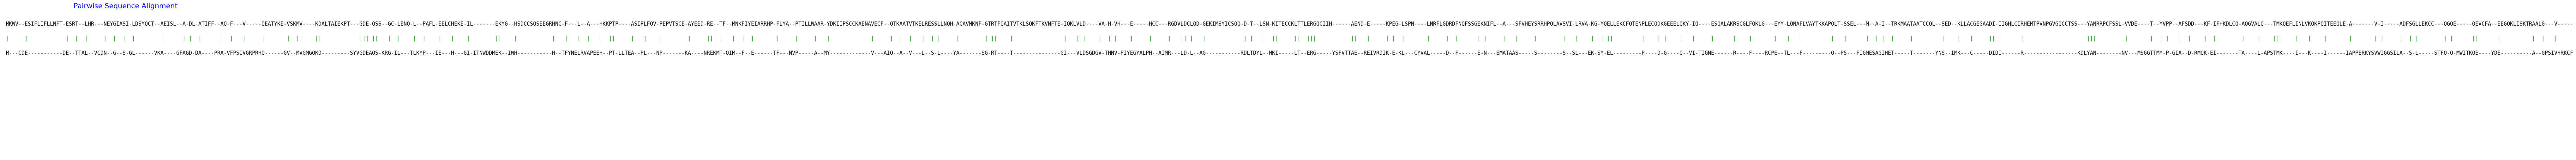

In [ ]:
import matplotlib.pyplot as plt
from Bio.Align import PairwiseAligner
from rich.console import Console
from rich.text import Text

# Function to perform pairwise sequence alignment using Bio.Align.PairwiseAligner
def perform_pairwise_alignment(seq1, seq2):
    aligner = PairwiseAligner()
    alignments = aligner.align(seq1, seq2)
    best_alignment = alignments[0]  # Selecting the best alignment
    return best_alignment

# Function to create color-coded alignment strings for plotting
def color_coded_alignment(align1, align2):
    match_line = ""

    for a, b in zip(align1, align2):
        if a == b:  # Match
            match_line += "|"
        elif a == "-" or b == "-":  # Gap
            match_line += " "
        else:  # Mismatch
            match_line += " "

    return match_line

# Visualize the alignment using Matplotlib with a title and color coding
def plot_alignment(align1, align2):
    match_line = color_coded_alignment(align1, align2)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_axis_off()

    # Display sequences and match line with color coding
    for i, (seq, line) in enumerate(zip([align1, match_line, align2], ["Query", "Match", "Subject"])):
        color = 'green' if line == "Match" else 'black'
        ax.text(0.01, 0.9 - 0.1*i, seq, fontsize=12, family='monospace', color=color)

    # Add a title
    plt.title("Pairwise Sequence Alignment", fontsize=16, color='blue')

    plt.show()

# Example sequences (Replace these with your actual sequences)
align1 = sequences['P02771']
align2 = sequences['P68137']

# Perform alignment
best_alignment = perform_pairwise_alignment(align1, align2)

# Extract the sequences from the best alignment
align1_aligned = best_alignment[0]
align2_aligned = best_alignment[1]

# Plot the alignment
plot_alignment(align1_aligned, align2_aligned)


**Step 4: Calculate Pearson Correlation Coefficient**

In [ ]:
import numpy as np
from collections import Counter
from scipy.stats import pearsonr
from rich.console import Console
from rich.table import Table

# Function to calculate amino acid composition and raw counts
def calculate_aa_composition(sequence):
    aa_counts = Counter(sequence)
    total_aa = sum(aa_counts.values())
    aa_composition = {aa: count / total_aa for aa, count in aa_counts.items()}
    return aa_composition, aa_counts

# Function to calculate Pearson correlation coefficient
def calculate_pearson_correlation(seq1, seq2):
    aa_composition1, aa_counts1 = calculate_aa_composition(seq1)
    aa_composition2, aa_counts2 = calculate_aa_composition(seq2)

    # Ensure both compositions have the same keys
    all_aas = set(aa_composition1.keys()).union(set(aa_composition2.keys()))
    comp1 = [aa_composition1.get(aa, 0) for aa in all_aas]
    comp2 = [aa_composition2.get(aa, 0) for aa in all_aas]

    # Use both compositions and raw counts for Pearson correlation
    count1 = [aa_counts1.get(aa, 0) for aa in all_aas]
    count2 = [aa_counts2.get(aa, 0) for aa in all_aas]

    # Combine compositions and counts into a single array
    combined1 = comp1 + count1
    combined2 = comp2 + count2

    return pearsonr(combined1, combined2), aa_composition1, aa_composition2, aa_counts1, aa_counts2

# Fetch sequences (already defined in your code)

# Calculate the Pearson correlation coefficient
(correlation, p_value), comp1, comp2, counts1, counts2 = calculate_pearson_correlation(
    sequences[accession_numbers[0]], sequences[accession_numbers[1]]
)

# Rich Console setup
console = Console()

# Create a table to display amino acid compositions
table = Table(title="Amino Acid Composition Comparison", header_style="bold bright_magenta")
table.add_column("Amino Acid", style="bold bright_cyan")
table.add_column(f"Composition {accession_numbers[0]}", justify="center", style="bold bright_yellow")
table.add_column(f"Composition {accession_numbers[1]}", justify="center", style="bold bright_yellow")
table.add_column(f"Counts {accession_numbers[0]}", justify="center", style="bold bright_green")
table.add_column(f"Counts {accession_numbers[1]}", justify="center", style="bold bright_green")

# Add rows to the table
for aa in sorted(set(comp1.keys()).union(comp2.keys())):
    table.add_row(
        aa,
        f"{comp1.get(aa, 0):.4f}",
        f"{comp2.get(aa, 0):.4f}",
        str(counts1.get(aa, 0)),
        str(counts2.get(aa, 0)),
    )

# Display the table
console.print(table)

# Display Pearson correlation result
console.print(f"\n[bold bright_cyan]Pearson correlation coefficient:[/bold bright_cyan] [bold bright_green]{correlation:.4f}[/bold bright_green]")
console.print(f"[bold bright_cyan]P-value:[/bold bright_cyan] [bold bright_red]{p_value:.4e}[/bold bright_red]")


                           Amino Acid Composition Comparison                            
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Amino Acid ┃ Composition P02771 ┃ Composition P68137 ┃ Counts P02771 ┃ Counts P68137 ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ A          │       0.0821       │       0.0769       │      50       │      29       │
│ C          │       0.0525       │       0.0159       │      32       │       6       │
│ D          │       0.0378       │       0.0584       │      23       │      22       │
│ E          │       0.0969       │       0.0743       │      59       │      28       │
│ F          │       0.0525       │       0.0318       │      32       │      12       │
│ G          │       0.0427       │       0.0743       │      26       │      28       │
│ H          │       0.0263       │       0.0239       │      16       │       9       │
│ I          │       0.0558       │       0.0796       │      34       │      30       │
│ K          │       0.0690       │       0.0504       │      42       │      19       │
│ L          │       0.0985       │       0.0690       │      60       │      26       │
│ M          │       0.0148       │       0.0451       │       9       │      17       │
│ N          │       0.0328       │       0.0318       │      20       │      12       │
│ P          │       0.0345       │       0.0504       │      21       │      19       │
│ Q          │       0.0657       │       0.0292       │      40       │      11       │
│ R          │       0.0361       │       0.0477       │      22       │      18       │
│ S          │       0.0624       │       0.0610       │      38       │      23       │
│ T          │       0.0591       │       0.0716       │      36       │      27       │
│ V          │       0.0493       │       0.0557       │      30       │      21       │
│ W          │       0.0033       │       0.0106       │       2       │       4       │
│ Y          │       0.0279       │       0.0424       │      17       │      16       │
└────────────┴────────────────────┴────────────────────┴───────────────┴───────────────┘

Pearson correlation coefficient: 0.8780

P-value: 1.0025e-13

**Step 5: Sequence Motif Analysis**

In [ ]:
from Bio import motifs
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from rich.console import Console
from rich.table import Table

# Example protein sequences as SeqRecord objects
seq1 = SeqRecord(Seq("MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGY"), id="P02771")
seq2 = SeqRecord(Seq("MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHTFYNELRVAPEEHPTLLTEAPLNPKANREKMTQIMFETFNVPAMYVAIQAVLSLYASGRTTGIVLDSGDGVTHNVPIYEGYALPHAIMRLDLAGRDLTDYLMKILTERGYSFVTTAEREIVRDIKEKLCYVALDFENEMATAASSSSLEKSYELPDGQVITIGNERFRCPETLFQPSFIGMESAGIHETTYNSIMKCDIDIRKDLYANNVMSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWITKQEYDEAGPSIVHRKCF"), id="P68137")

# Create a motif object from SeqRecord instances
instances = [seq1.seq, seq2.seq]
motif = motifs.create(instances)

# Rich console setup
console = Console()

# Display the motif consensus sequence
console.print("[bold bright_cyan]Motif Consensus Sequence:[/bold bright_cyan]")
console.print(f"[bold bright_yellow]{motif.consensus}[/bold bright_yellow]")

# Display the motif alignment sequences
console.print("\n[bold bright_cyan]Motif Alignment Sequences:[/bold bright_cyan]")
alignment_table = Table(show_header=True, header_style="bold bright_cyan")
alignment_table.add_column("Sequence ID", style="bold bright_white")
alignment_table.add_column("Aligned Sequence", style="bold bright_yellow")

for i, sequence in enumerate(motif.alignment.sequences):
    alignment_table.add_row(f"Sequence {i+1}", str(sequence))

console.print(alignment_table)

# Display additional motif information
info_table = Table(title="Motif Information", header_style="bold bright_cyan")
info_table.add_column("Property", style="bold bright_white")
info_table.add_column("Value", style="bold bright_red")

info_table.add_row("Motif Length", str(motif.length))
info_table.add_row("Motif Alphabet", str(motif.alphabet))
info_table.add_row("Number of Sequences", str(len(motif.alignment.sequences)))

console.print(info_table)


Motif Consensus Sequence:

ACAAAATTAAACAAGTGAATAGAAGAGAAAAAAAAACGAAAAAAAAAGAGAAAAAAGATAAAAAGAATAAATAAAGATGAAAAAGCAAAATAAAAAAAAAAAAATAATGAAACCA
AAAAGATACAAATAAATAAAAAAAAAAAAAAACAATGAAAATGAGATAAAAAAAGAAAAAATAAAAAAGAAATAAACCAATAAGACAATTAATATAAAAAAAACAAAACAAAAAA
GAATAAAATATAAAAAGTAATAGAAAAACAATAAAAAACCAGAAGACATTGAAAAACACAAAATAAAAATACCGTTTAAGGACAAAAAATAAAAGTAAAAAAAAGAAAAAAAAGG
AAAAAAATAAAAAATAAAAAAAGAAAAAAACA

Motif Alignment Sequences:

┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Sequence ID ┃ Aligned Sequence                                                                                  ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sequence 1  │ MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLE… │
│ Sequence 2  │ MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHTFYNEL… │
└─────────────┴───────────────────────────────────────────────────────────────────────────────────────────────────┘

       Motif Information       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Property            ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Motif Length        │ 377   │
│ Motif Alphabet      │ ACGT  │
│ Number of Sequences │ 2     │
└─────────────────────┴───────┘

**Step 6: Data Visualization**

**(1) Amino Acid Distribution**

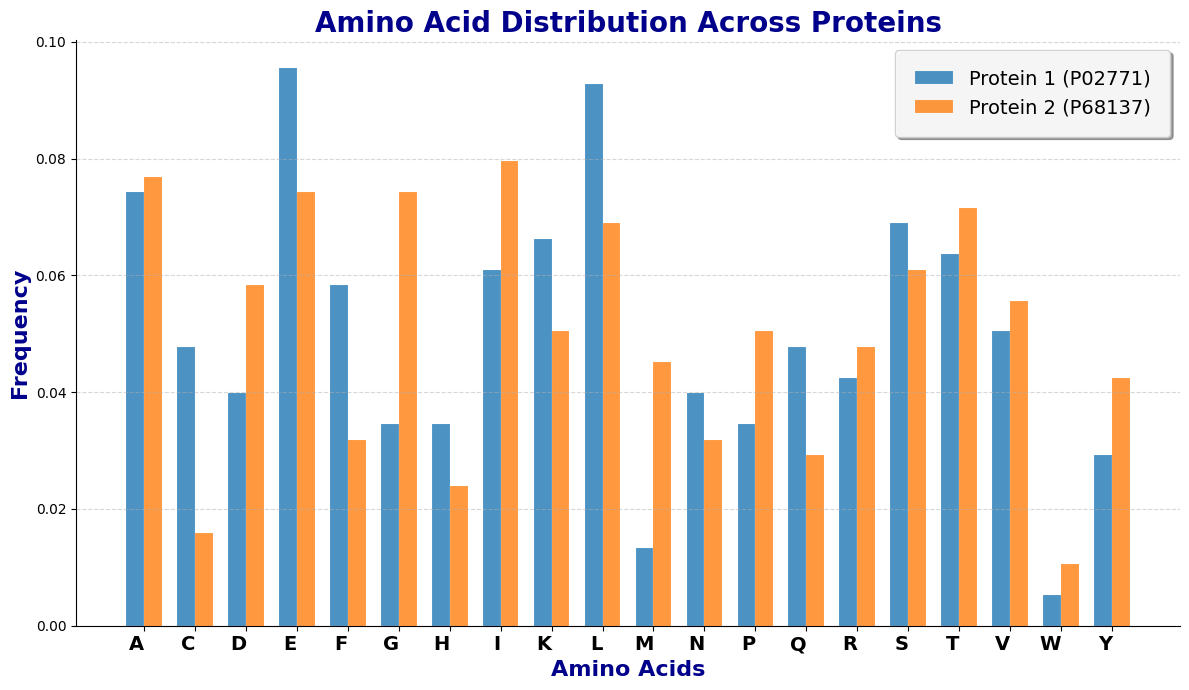

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot amino acid distribution
def plot_aa_distribution(sequences):
    # Extract unique amino acids and calculate frequencies
    amino_acids = sorted(set(''.join(sequences.values())))
    frequencies = {acc: [seq.count(aa) / len(seq) for aa in amino_acids] for acc, seq in sequences.items()}

    # X-axis setup
    x = np.arange(len(amino_acids))
    width = 0.35
    colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange colors

    # Create plot
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plot bars for each protein sequence
    for i, (acc, freqs) in enumerate(frequencies.items()):
        ax.bar(x + i * width, freqs, width, label=f'Protein {i+1} ({acc})', color=colors[i], alpha=0.8, edgecolor='white', linewidth=0.1)

    # Set labels and title with refined styling
    ax.set_xlabel('Amino Acids', fontsize=16, weight='bold', color='darkblue')
    ax.set_ylabel('Frequency', fontsize=16, weight='bold', color='darkblue')
    ax.set_title('Amino Acid Distribution Across Proteins', fontsize=20, weight='bold', color='darkblue')

    # Customize x-ticks for better readability
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(amino_acids, fontsize=14, rotation=0, ha='right', weight='bold')

    # Enhance the legend
    ax.legend(fontsize=14, loc='upper right', frameon=True, shadow=True, fancybox=True, framealpha=0.9, borderpad=1)

    # Add a grid with subtle styling
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Remove the top and right spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example sequences dictionary
sequences = {
    'P02771': 'MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGY',
    'P68137': 'MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHTFYNELRVAPEEHPTLLTEAPLNPKANREKMTQIMFETFNVPAMYVAIQAVLSLYASGRTTGIVLDSGDGVTHNVPIYEGYALPHAIMRLDLAGRDLTDYLMKILTERGYSFVTTAEREIVRDIKEKLCYVALDFENEMATAASSSSLEKSYELPDGQVITIGNERFRCPETLFQPSFIGMESAGIHETTYNSIMKCDIDIRKDLYANNVMSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWITKQEYDEAGPSIVHRKCF'
}

# Plot amino acid distribution
plot_aa_distribution(sequences)


**(2) Sequence Alignment Visualization**

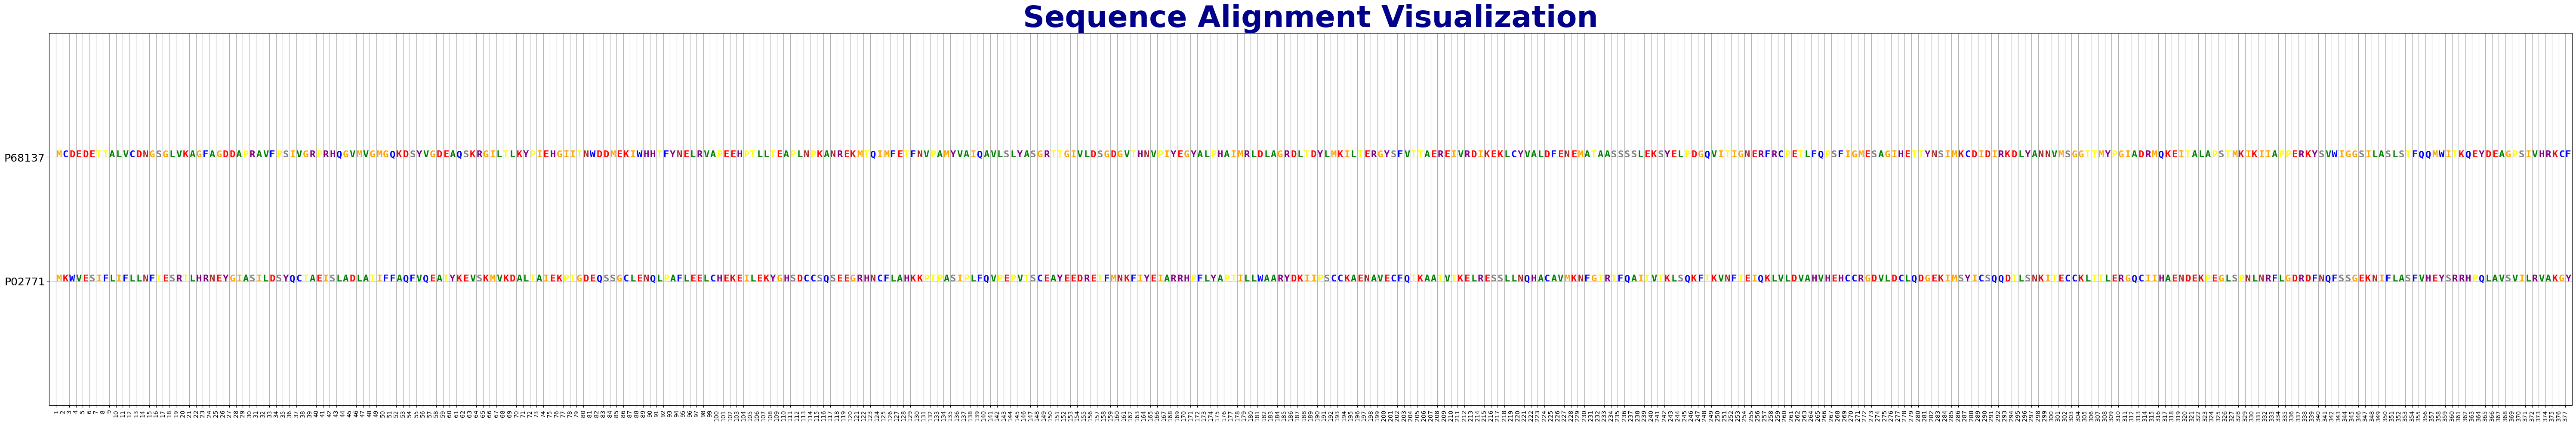

Sequence alignment figure saved as 'sequence_alignment.png'


In [ ]:
import matplotlib.pyplot as plt
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import AlignIO  # Import AlignIO separately

# Create example sequences with IDs only
seq1 = SeqRecord(Seq("MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGY"), id="P02771")
seq2 = SeqRecord(Seq("MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHTFYNELRVAPEEHPTLLTEAPLNPKANREKMTQIMFETFNVPAMYVAIQAVLSLYASGRTTGIVLDSGDGVTHNVPIYEGYALPHAIMRLDLAGRDLTDYLMKILTERGYSFVTTAEREIVRDIKEKLCYVALDFENEMATAASSSSLEKSYELPDGQVITIGNERFRCPETLFQPSFIGMESAGIHETTYNSIMKCDIDIRKDLYANNVMSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWITKQEYDEAGPSIVHRKCF"), id="P68137")

# Create an alignment
alignment = MultipleSeqAlignment([seq1, seq2])

# Function to plot sequence alignment using IDs
def plot_sequence_alignment(alignment, save_path='sequence_alignment.png'):
    fig, ax = plt.subplots(figsize=(60, 10))
    colors = {'A': 'green', 'C': 'blue', 'D': 'red', 'E': 'red', 'F': 'blue',
              'G': 'orange', 'H': 'purple', 'I': 'orange', 'K': 'red', 'L': 'green',
              'M': 'orange', 'N': 'brown', 'P': 'yellow', 'Q': 'blue', 'R': 'purple',
              'S': 'grey', 'T': 'yellow', 'V': 'green', 'W': 'blue', 'Y': 'purple'}

    for i, record in enumerate(alignment):
        for j, letter in enumerate(record.seq):
            ax.text(j, i, letter, fontsize=16, weight='bold',
                    family='monospace', color=colors.get(letter, 'black'))

    ax.set_xlim(-1, len(alignment[0].seq))
    ax.set_ylim(-1, len(alignment))
    ax.set_yticks(range(len(alignment)))
    ax.set_yticklabels([record.id for record in alignment], fontsize=18)
    ax.set_xticks(range(len(alignment[0].seq)))
    ax.set_xticklabels(range(1, len(alignment[0].seq) + 1), fontsize=10, rotation=90)
    ax.grid(True)
    ax.set_title("Sequence Alignment Visualization", fontsize=50, weight='bold', color='darkblue')
    ax.axis('on')
    plt.tight_layout()
    plt.show()

# Plot sequence alignment and save the figure
plot_sequence_alignment(alignment, save_path='/mnt/data/sequence_alignment.png')

print("Sequence alignment figure saved as 'sequence_alignment.png'")


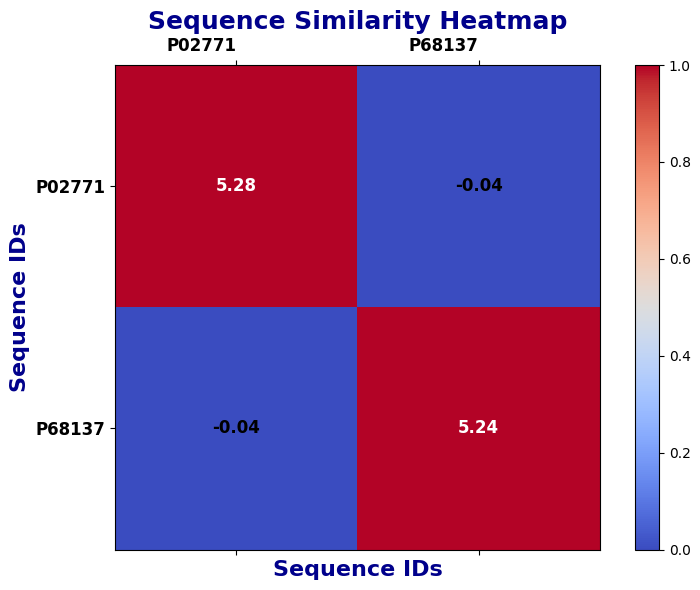

In [86]:
from Bio import pairwise2
from Bio.Seq import Seq
from Bio import ExPASy
from Bio import SwissProt
from Bio.Align import substitution_matrices
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate sequence similarity scores using global alignment
def calculate_similarity_matrix(sequences):
    ids = list(sequences.keys())
    num_seqs = len(ids)
    similarity_matrix = np.zeros((num_seqs, num_seqs))

    for i in range(num_seqs):
        for j in range(i, num_seqs):
            seq1 = sequences[ids[i]]
            seq2 = sequences[ids[j]]

            # Perform global pairwise alignment with blosum62 scoring matrix
            alignments = pairwise2.align.globalds(seq1, seq2, substitution_matrices.load("BLOSUM62"), -10, -0.5)
            alignment_score = alignments[0].score
            similarity_score = alignment_score / max(len(seq1), len(seq2))

            # Store similarity score in both upper and lower triangle of matrix
            similarity_matrix[i, j] = similarity_score
            similarity_matrix[j, i] = similarity_score

    return similarity_matrix, ids

# Function to plot similarity matrix as heatmap
def plot_similarity_matrix(similarity_matrix, ids):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Use 'coolwarm' color map for the heatmap
    cax = ax.matshow(similarity_matrix, cmap='coolwarm', vmin=0, vmax=1)
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(ids)))
    ax.set_yticks(np.arange(len(ids)))
    ax.set_xticklabels(ids, rotation=0, ha='right', fontsize=12, weight='bold')
    ax.set_yticklabels(ids, fontsize=12, weight='bold')

    # Adding text annotations to the heatmap cells
    for i in range(len(ids)):
        for j in range(len(ids)):
            ax.text(j, i, f'{similarity_matrix[i, j]:.2f}',
                    ha='center', va='center', color='white' if similarity_matrix[i, j] > 0.5 else 'black',
                    fontsize=12, weight='bold')

    plt.xlabel('Sequence IDs', fontsize=16, weight='bold', color='darkblue')
    plt.ylabel('Sequence IDs', fontsize=16, weight='bold', color='darkblue')
    plt.title('Sequence Similarity Heatmap', fontsize=18, color='darkblue', weight='bold')

    plt.tight_layout()
    plt.show()

# Example sequence IDs
sequence_ids = ["P02771", "P68137"]

# Example sequences dictionary
sequences = {
    'P02771': 'MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGY',
    'P68137': 'MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHTFYNELRVAPEEHPTLLTEAPLNPKANREKMTQIMFETFNVPAMYVAIQAVLSLYASGRTTGIVLDSGDGVTHNVPIYEGYALPHAIMRLDLAGRDLTDYLMKILTERGYSFVTTAEREIVRDIKEKLCYVALDFENEMATAASSSSLEKSYELPDGQVITIGNERFRCPETLFQPSFIGMESAGIHETTYNSIMKCDIDIRKDLYANNVMSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWITKQEYDEAGPSIVHRKCF'
}

# Calculate similarity matrix
similarity_matrix, ids = calculate_similarity_matrix(sequences)

# Plot similarity matrix
plot_similarity_matrix(similarity_matrix, ids)
